###### Credit : superdatascience.com

Business case : Analyse advertisement version testing & build a reinforcement model to help the selection of the ad with the biggest conversion rate

## Data

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


## 1/ Upper Confidence Bound

##### Model

* Variable Ni(n) : Numbers of selections, Ri(n) : Sums of rewards
* Total number of users = 10000 = N
* Number of ads = 10 = d
* List of selected ads over the rounds
* Total reward = sum of all the rewards received at each round (accumulative)

In [47]:
N = len(dataset)
d = len(dataset.columns)

ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

In [48]:
import math

In [49]:
# n : rounds (users), delta_i : confidence interval
for n in range(0, N) :
    ad = 0
    max_upper_bound = 0
    for i in range(0, d) :
        if numbers_of_selections[i] > 0 :
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]       # Step 2 First Computation
            delta_i = math.sqrt((3/2 * math.log(n + 1)) / numbers_of_selections[i])     # Step 2 Second Computation
            upper_bound = average_reward + delta_i
        else :
            upper_bound = 1e400
        if upper_bound > max_upper_bound :
            max_upper_bound = upper_bound
            ad = i
            # else & second if statement is to make sure to select ads so that numbers_of_selections will be greater than zero
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1      # or numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Result

In [50]:
print(numbers_of_selections)

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]


In [51]:
print(sums_of_rewards)

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


In [52]:
print(total_reward)

2178


In [139]:
percentage = np.zeros(10)

In [140]:
df = {'Selection' : numbers_of_selections, 'Rewards' : sums_of_rewards, 'Percent of Total' : percentage}

In [141]:
result = pd.DataFrame(data = df, index = ['Ad1', 'Ad2', 'Ad3', 'Ad4', 'Ad5', 'Ad6', 'Ad7', 'Ad8', 'Ad9', 'Ad10'])

In [142]:
percentage = []
for i in range(0, 10) :
    percentage.append(round((result.values[i, 1] / result.values[i, 0]) * 100, 1))

In [143]:
df = {'Selection' : numbers_of_selections, 'Rewards' : sums_of_rewards, 'Percent of Total' : percentage}
result = pd.DataFrame(data = df, index = ['Ad1', 'Ad2', 'Ad3', 'Ad4', 'Ad5', 'Ad6', 'Ad7', 'Ad8', 'Ad9', 'Ad10'])

In [145]:
result.transpose()

,Ad1,Ad2,Ad3,Ad4,Ad5,Ad6,Ad7,Ad8,Ad9,Ad10
Selection,705.0,387.0,186.0,345.0,6323.0,150.0,292.0,1170.0,256.0,186.0
Rewards,120.0,47.0,7.0,38.0,1675.0,1.0,27.0,236.0,20.0,7.0
Percent of Total,17.0,12.1,3.8,11.0,26.5,0.7,9.2,20.2,7.8,3.8


##### Visualisation

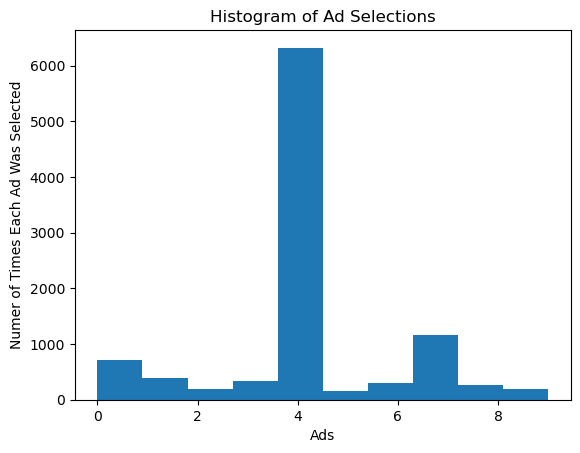

In [147]:
plt.hist(x = ads_selected)

plt.title('Histogram of Ad Selections')
plt.xlabel('Ads')
plt.ylabel('Numer of Times Each Ad Was Selected')
plt.show()

Ad Number 5 (Ad with index 4)

## 2/ Thompson Sampling

## Model

In [148]:
import random

In [149]:
N = 10000      
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

In [150]:
for n in range(0, N) :
    ad = 0
    max_random = 0
    for i in range(0, d) :
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random :
            max_random = random_beta
            ad = i
            # No need for Else statement since we just keep the last ad number
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1 :
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else :
        numbers_of_rewards_0[ad] + numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Result

In [151]:
print(numbers_of_rewards_1)

[1, 151, 1, 75, 1868, 0, 23, 194, 21, 4]


In [152]:
print(numbers_of_rewards_0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [153]:
print(total_reward)

2338


##### Visualisation

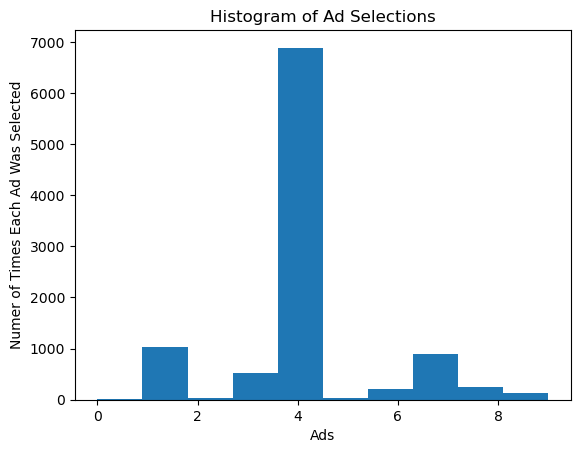

In [155]:
plt.hist(x = ads_selected)

plt.title('Histogram of Ad Selections')
plt.xlabel('Ads')
plt.ylabel('Numer of Times Each Ad Was Selected')
plt.show()

Ad Number 5 (Ad with index 4)